<a href="https://github.com/GH-sachin/HousePricePrediction/blob/main/house-price-prediction-using-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - House Price Prediction with Machine Learning


##### **Project Type**    - Regression
##### **Industry**    - Damsole Technologies Pvt ltd
##### **Name -**  - Sachin Wadkar
##### **Level -** - 1
##### **Task -** - House Price Prediction

# **Project Summary -**

This project focuses on predicting house prices using machine learning techniques. The dataset consists of various features such as the number of bedrooms, bathrooms, square footage, location details, and property conditions. The goal is to analyze these factors, preprocess the data, perform feature engineering, and apply regression models to make accurate price predictions.

#### **The workflow includes:**

  - **Understanding the dataset**
  - **Performing exploratory data analysis (EDA)**
  - **Handling missing values and outliers**
  - **Feature engineering and selection**
  - **Implementing machine learning models**
  - **Evaluating model performance**

By the end of the project, a trained model will be capable of predicting house prices based on input features.

# **Problem Statement**

Real estate pricing is influenced by multiple factors, making it challenging for buyers and sellers to estimate the correct property value. The objective of this project is to build a machine learning model that can predict house prices based on historical data. By leveraging regression techniques, this model aims to assist real estate agents, buyers, and sellers in making informed decisions regarding property valuation.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import model selection libraries
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Import math for Mahematical 
import math

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Dataset Loading

In [2]:
#Formating loading dataset
pd.options.display.float_format = '{:,.2f}'.format

# Load Dataset 
df = pd.read_csv("data.xls")


### Dataset First View

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

date        price  bedrooms  bathrooms  sqft_living  \
0  2014-05-02 00:00:00   313,000.00      3.00       1.50         1340   
1  2014-05-02 00:00:00 2,384,000.00      5.00       2.50         3650   
2  2014-05-02 00:00:00   342,000.00      3.00       2.00         1930   
3  2014-05-02 00:00:00   420,000.00      3.00       2.25         2000   
4  2014-05-02 00:00:00   550,000.00      4.00       2.50         1940   

   sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  \
0      7912    1.50           0     0          3        1340              0   
1      9050    2.00           0     4          5        3370            280   
2     11947    1.00           0     0          4        1930              0   
3      8030    1.00           0     0          4        1000           1000   
4     10500    1.00           0     0          4        1140            800   

   yr_built  yr_renovated                    street       city  statezip  \
0      1955          2005      18810 Densmore Ave N  Shoreline  WA 98133   
1      1921             0           709 W Blaine St    Seattle  WA 98119   
2      1966             0  26206-26214 143rd Ave SE       Kent  WA 98042   
3      1963             0           857 170th Pl NE   Bellevue  WA 98008   
4      1976          1992         9105 170th Ave NE    Redmond  WA 98052   

  country  
0     USA  
1     USA  
2     USA  
3     USA  
4     USA

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  4600
Number of columns are:  18


### Dataset Information 

* Date : Date of the listing of the house in the dataset
* Price : Listing price of the property
* Bedrooms : Number of bedrooms in the house
* Bathrooms : Number of bathrooms in the house
* Sqft Living : Living area in square feet
* Sqft Lot : Lot area in square feet
* Floors : Number of floors in the house
* Waterfront : Indicates if property is waterfront
* View : Type of view from the property
* Condition : Condition of the property
* Sqft Above : Square feet above ground level
* Sqft Basement : Square feet of the basement
* Yr Built : Year the property was built
* Yr Renovated : Year of renovation
* Street : Street address of the property
* City : City where the property is located
* State/Zip : State and ZIP code
* Country : Country of the property* 

 * Data Checks to perform
 * Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values in each column
* Check statistics of the data set
* Check the correlation column**


In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### Check Missing values / Null Values

In [7]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Check Duplicates #


In [8]:
df.duplicated().sum()

0

### Check unique Values

In [9]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

## ***2. Understanding The Variables***

In [10]:
# Dataset Columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [11]:
# Dataset Describe (all columns included)
#df.describe(include= 'all').round(2)

df.describe().T

count       mean        std      min        25%        50%  \
price         4,600.00 551,962.99 563,834.70     0.00 322,875.00 460,943.46   
bedrooms      4,600.00       3.40       0.91     0.00       3.00       3.00   
bathrooms     4,600.00       2.16       0.78     0.00       1.75       2.25   
sqft_living   4,600.00   2,139.35     963.21   370.00   1,460.00   1,980.00   
sqft_lot      4,600.00  14,852.52  35,884.44   638.00   5,000.75   7,683.00   
floors        4,600.00       1.51       0.54     1.00       1.00       1.50   
waterfront    4,600.00       0.01       0.08     0.00       0.00       0.00   
view          4,600.00       0.24       0.78     0.00       0.00       0.00   
condition     4,600.00       3.45       0.68     1.00       3.00       3.00   
sqft_above    4,600.00   1,827.27     862.17   370.00   1,190.00   1,590.00   
sqft_basement 4,600.00     312.08     464.14     0.00       0.00       0.00   
yr_built      4,600.00   1,970.79      29.73 1,900.00   1,951.00   1,976.00   
yr_renovated  4,600.00     808.61     979.41     0.00       0.00       0.00   

                     75%           max  
price         654,962.50 26,590,000.00  
bedrooms            4.00          9.00  
bathrooms           2.50          8.00  
sqft_living     2,620.00     13,540.00  
sqft_lot       11,001.25  1,074,218.00  
floors              2.00          3.50  
waterfront          0.00          1.00  
view                0.00          4.00  
condition           4.00          5.00  
sqft_above      2,300.00      9,410.00  
sqft_basement     610.00      4,820.00  
yr_built        1,997.00      2,014.00  
yr_renovated    1,999.00      2,014.00

## ***3. Data Wrangling***

In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

We have 5 categorical features : ['date', 'street', 'city', 'statezip', 'country']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

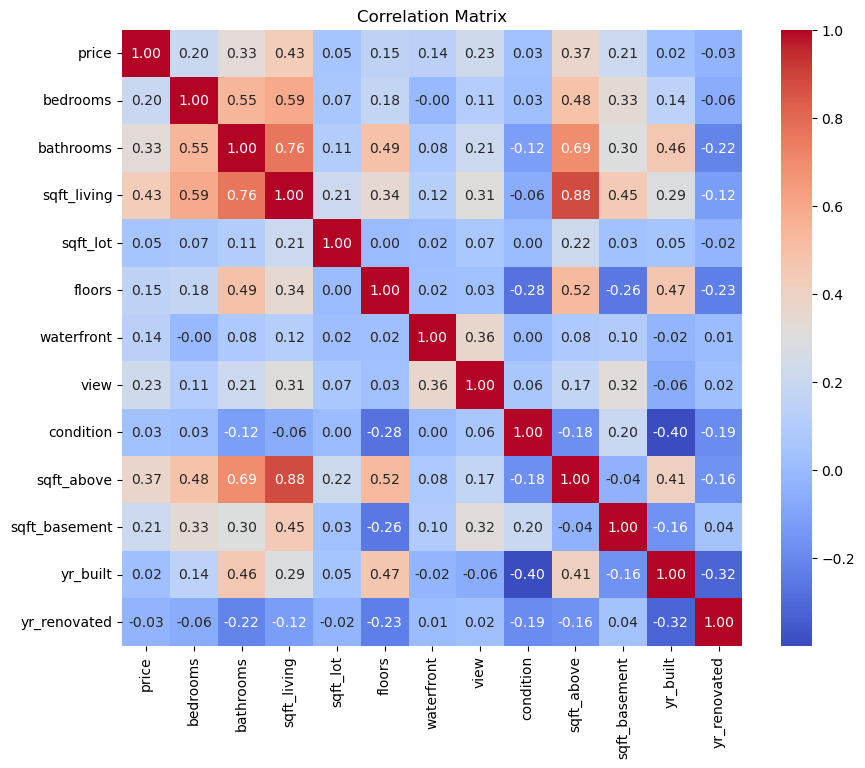

In [13]:
# Chart - 1 Correlation matrix  Visualization Code For Numerical and categorical variables
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

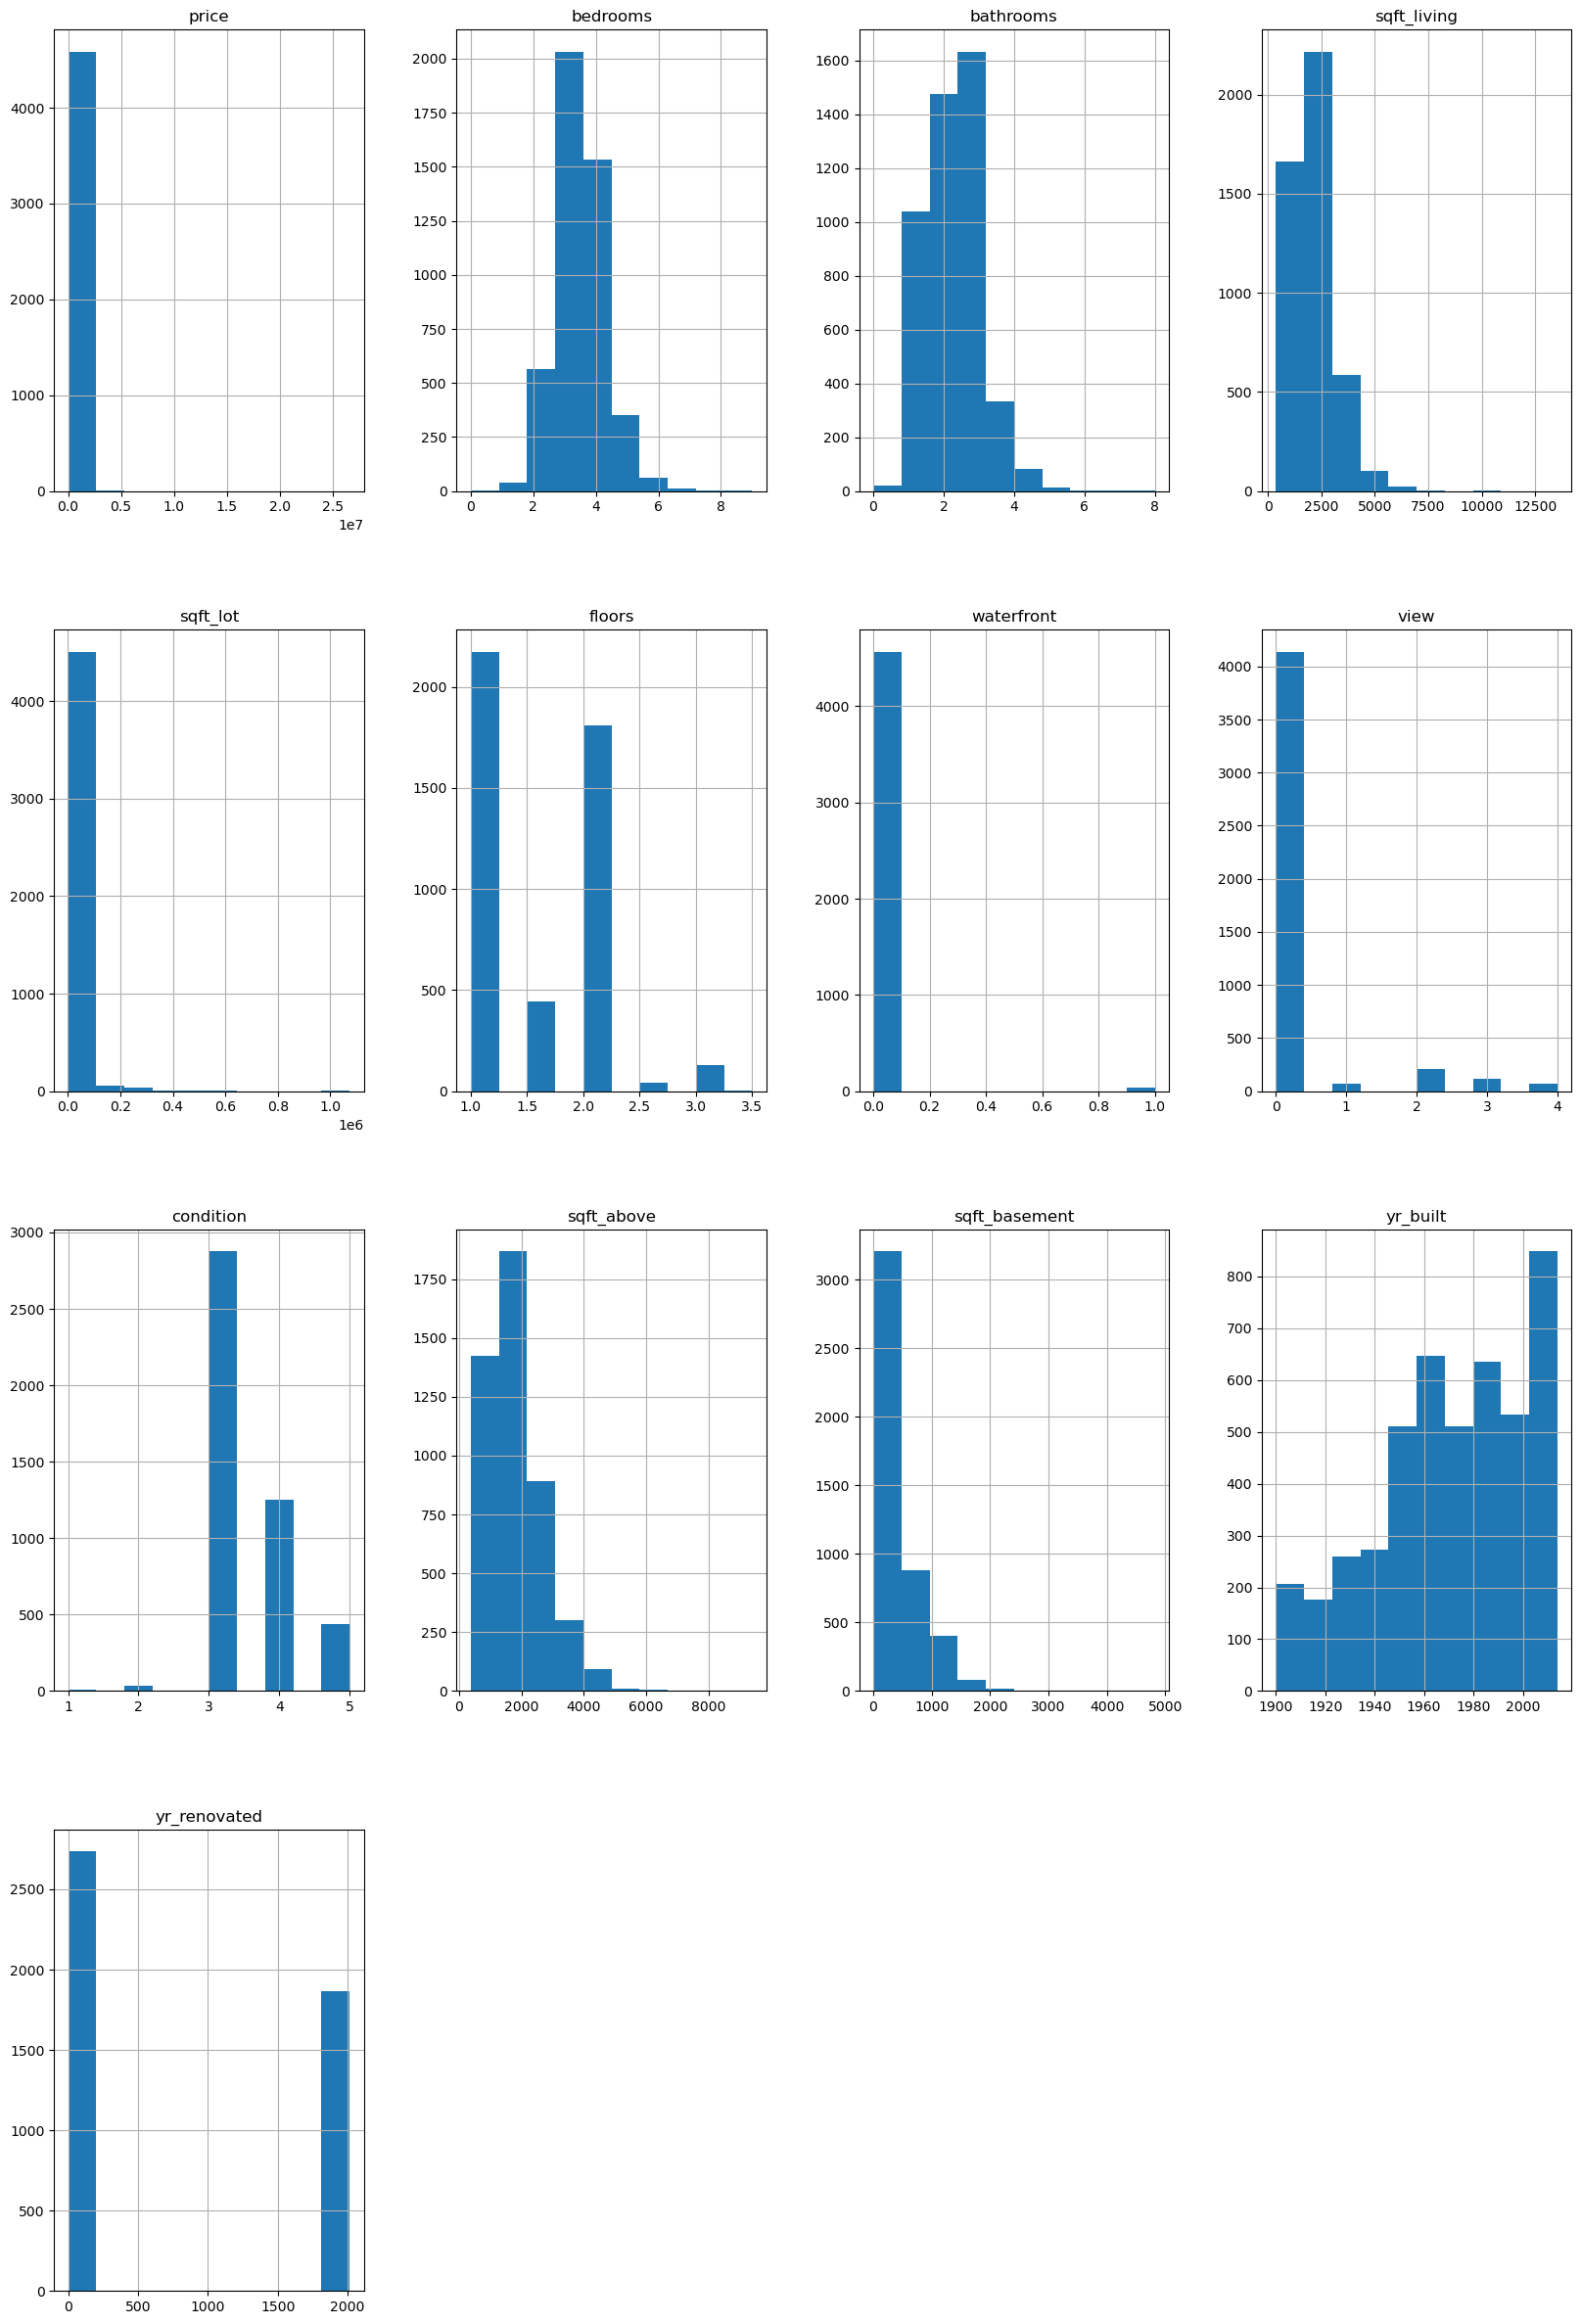

In [14]:
# Chart - 2 Hostigram Plot Visualization Code For details of Data
df.hist(figsize=(20,30))
plt.show()

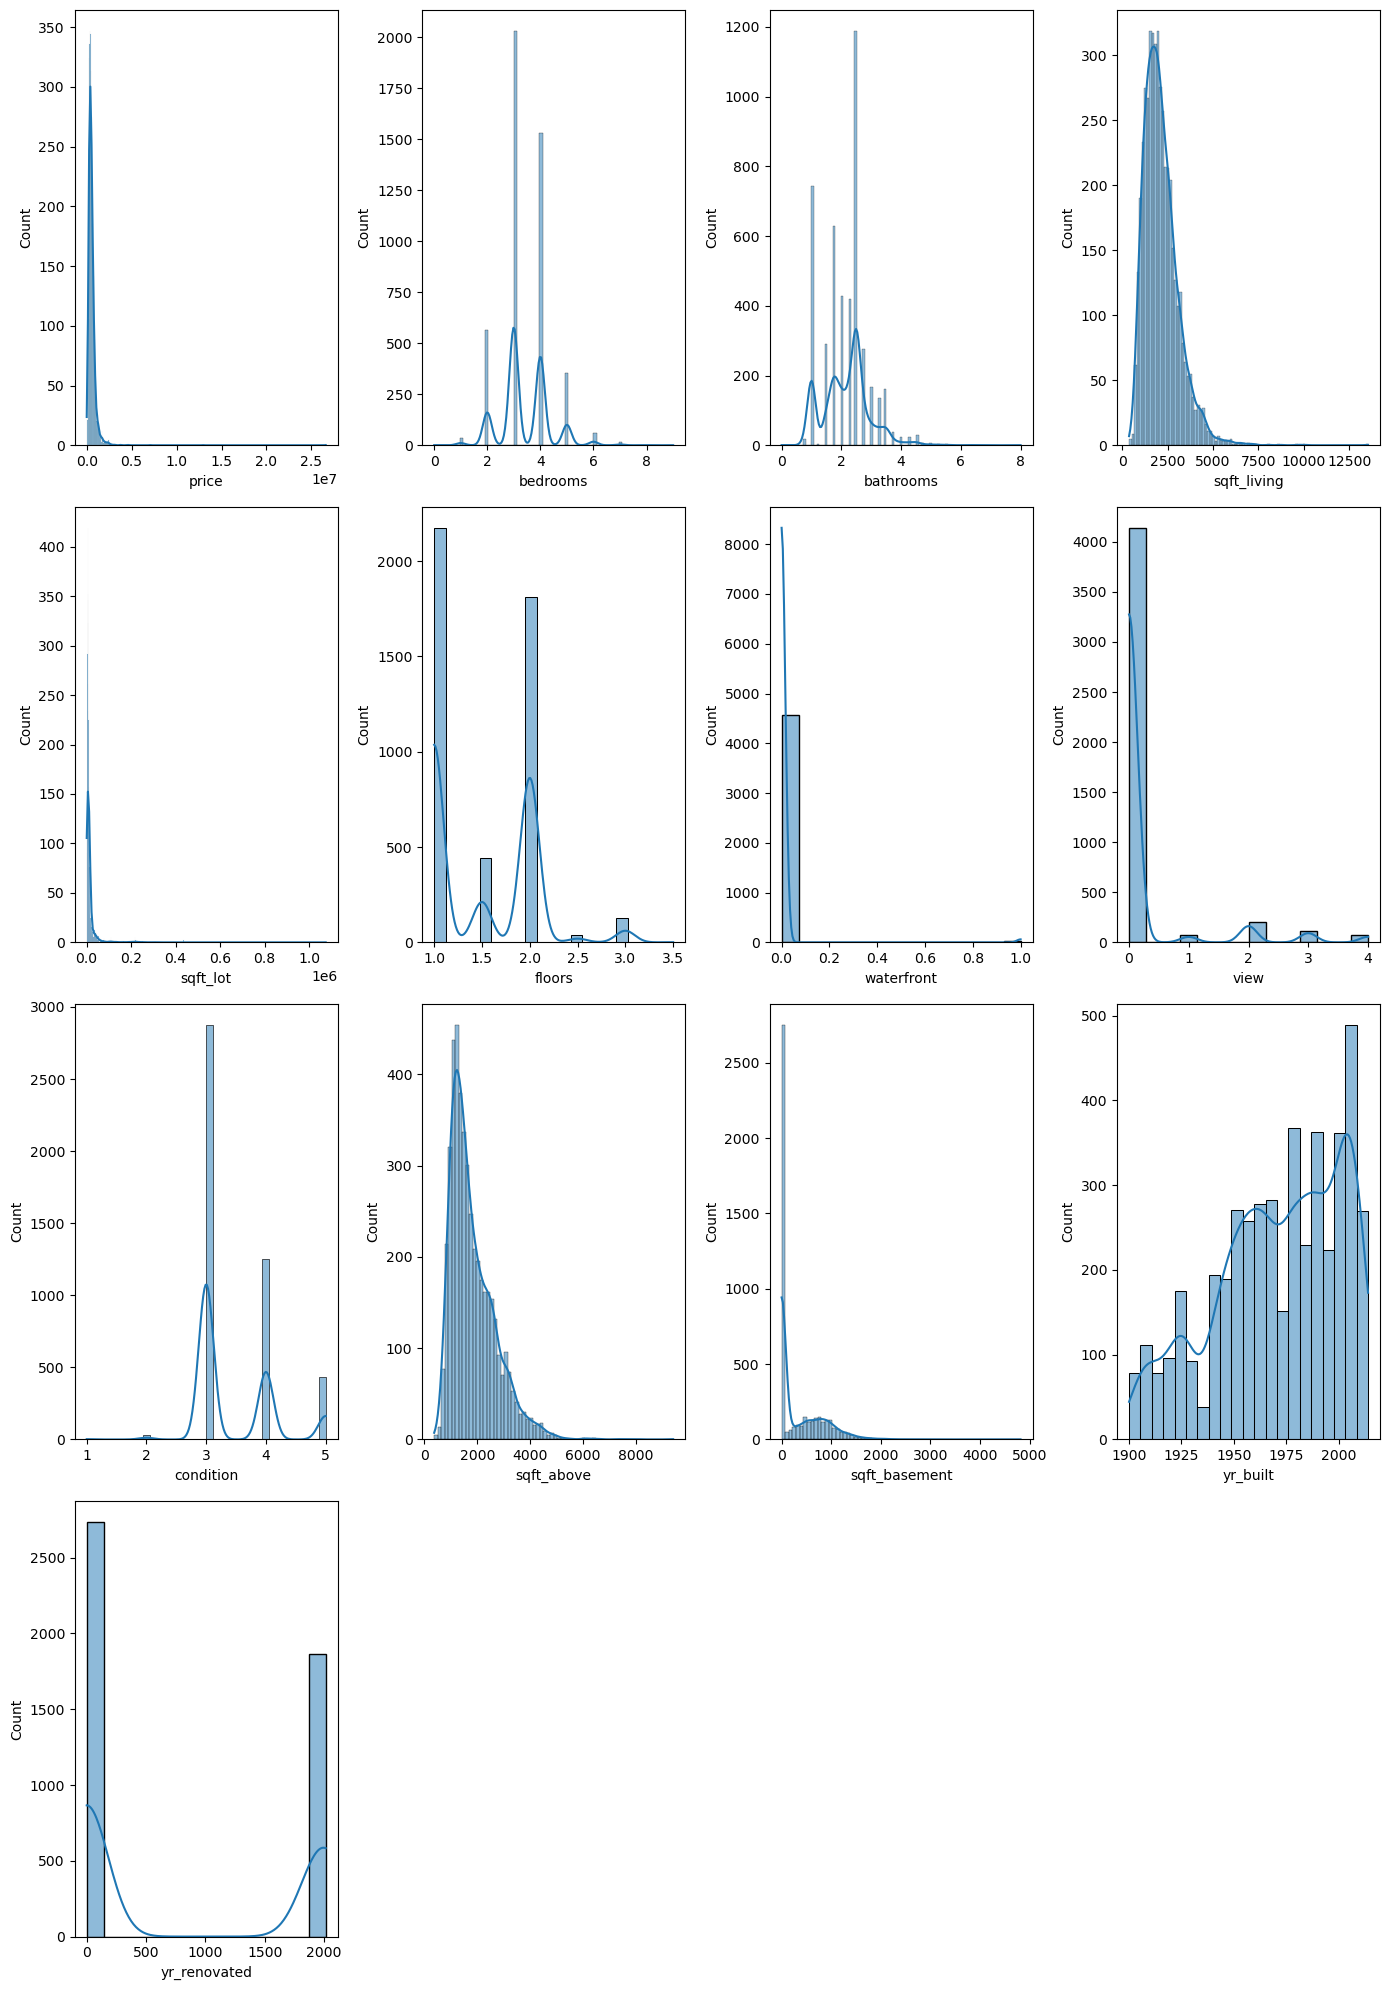

In [15]:
#Chart 3 -  histogram with a kernel density estimate (KDE) for the current feature
#Number of columns for the subplots
n_cols = 4  

# Calculate the number of rows required to fit all numeric features
n_rows = math.ceil(len(numeric_features) / n_cols)

# Create a grid of subplots with the calculated number of rows and columns
# figsize adjusts the overall figure size (width, height)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 5))

# Flatten the grid of axes into a 1D array for easier indexing
axes = axes.flatten()

# Loop over the numeric features to plot histograms for each feature
for i, colum in enumerate(numeric_features):
    # Plot a histogram with a kernel density estimate (KDE) for the current feature
    sns.histplot(data=df[colum], ax=axes[i], kde=True)
    # Remove unused axes from the grid
# If the number of numeric features is less than the total number of subplots,
# delete the extra axes to avoid empty plots
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


<Figure size 2500x500 with 0 Axes>

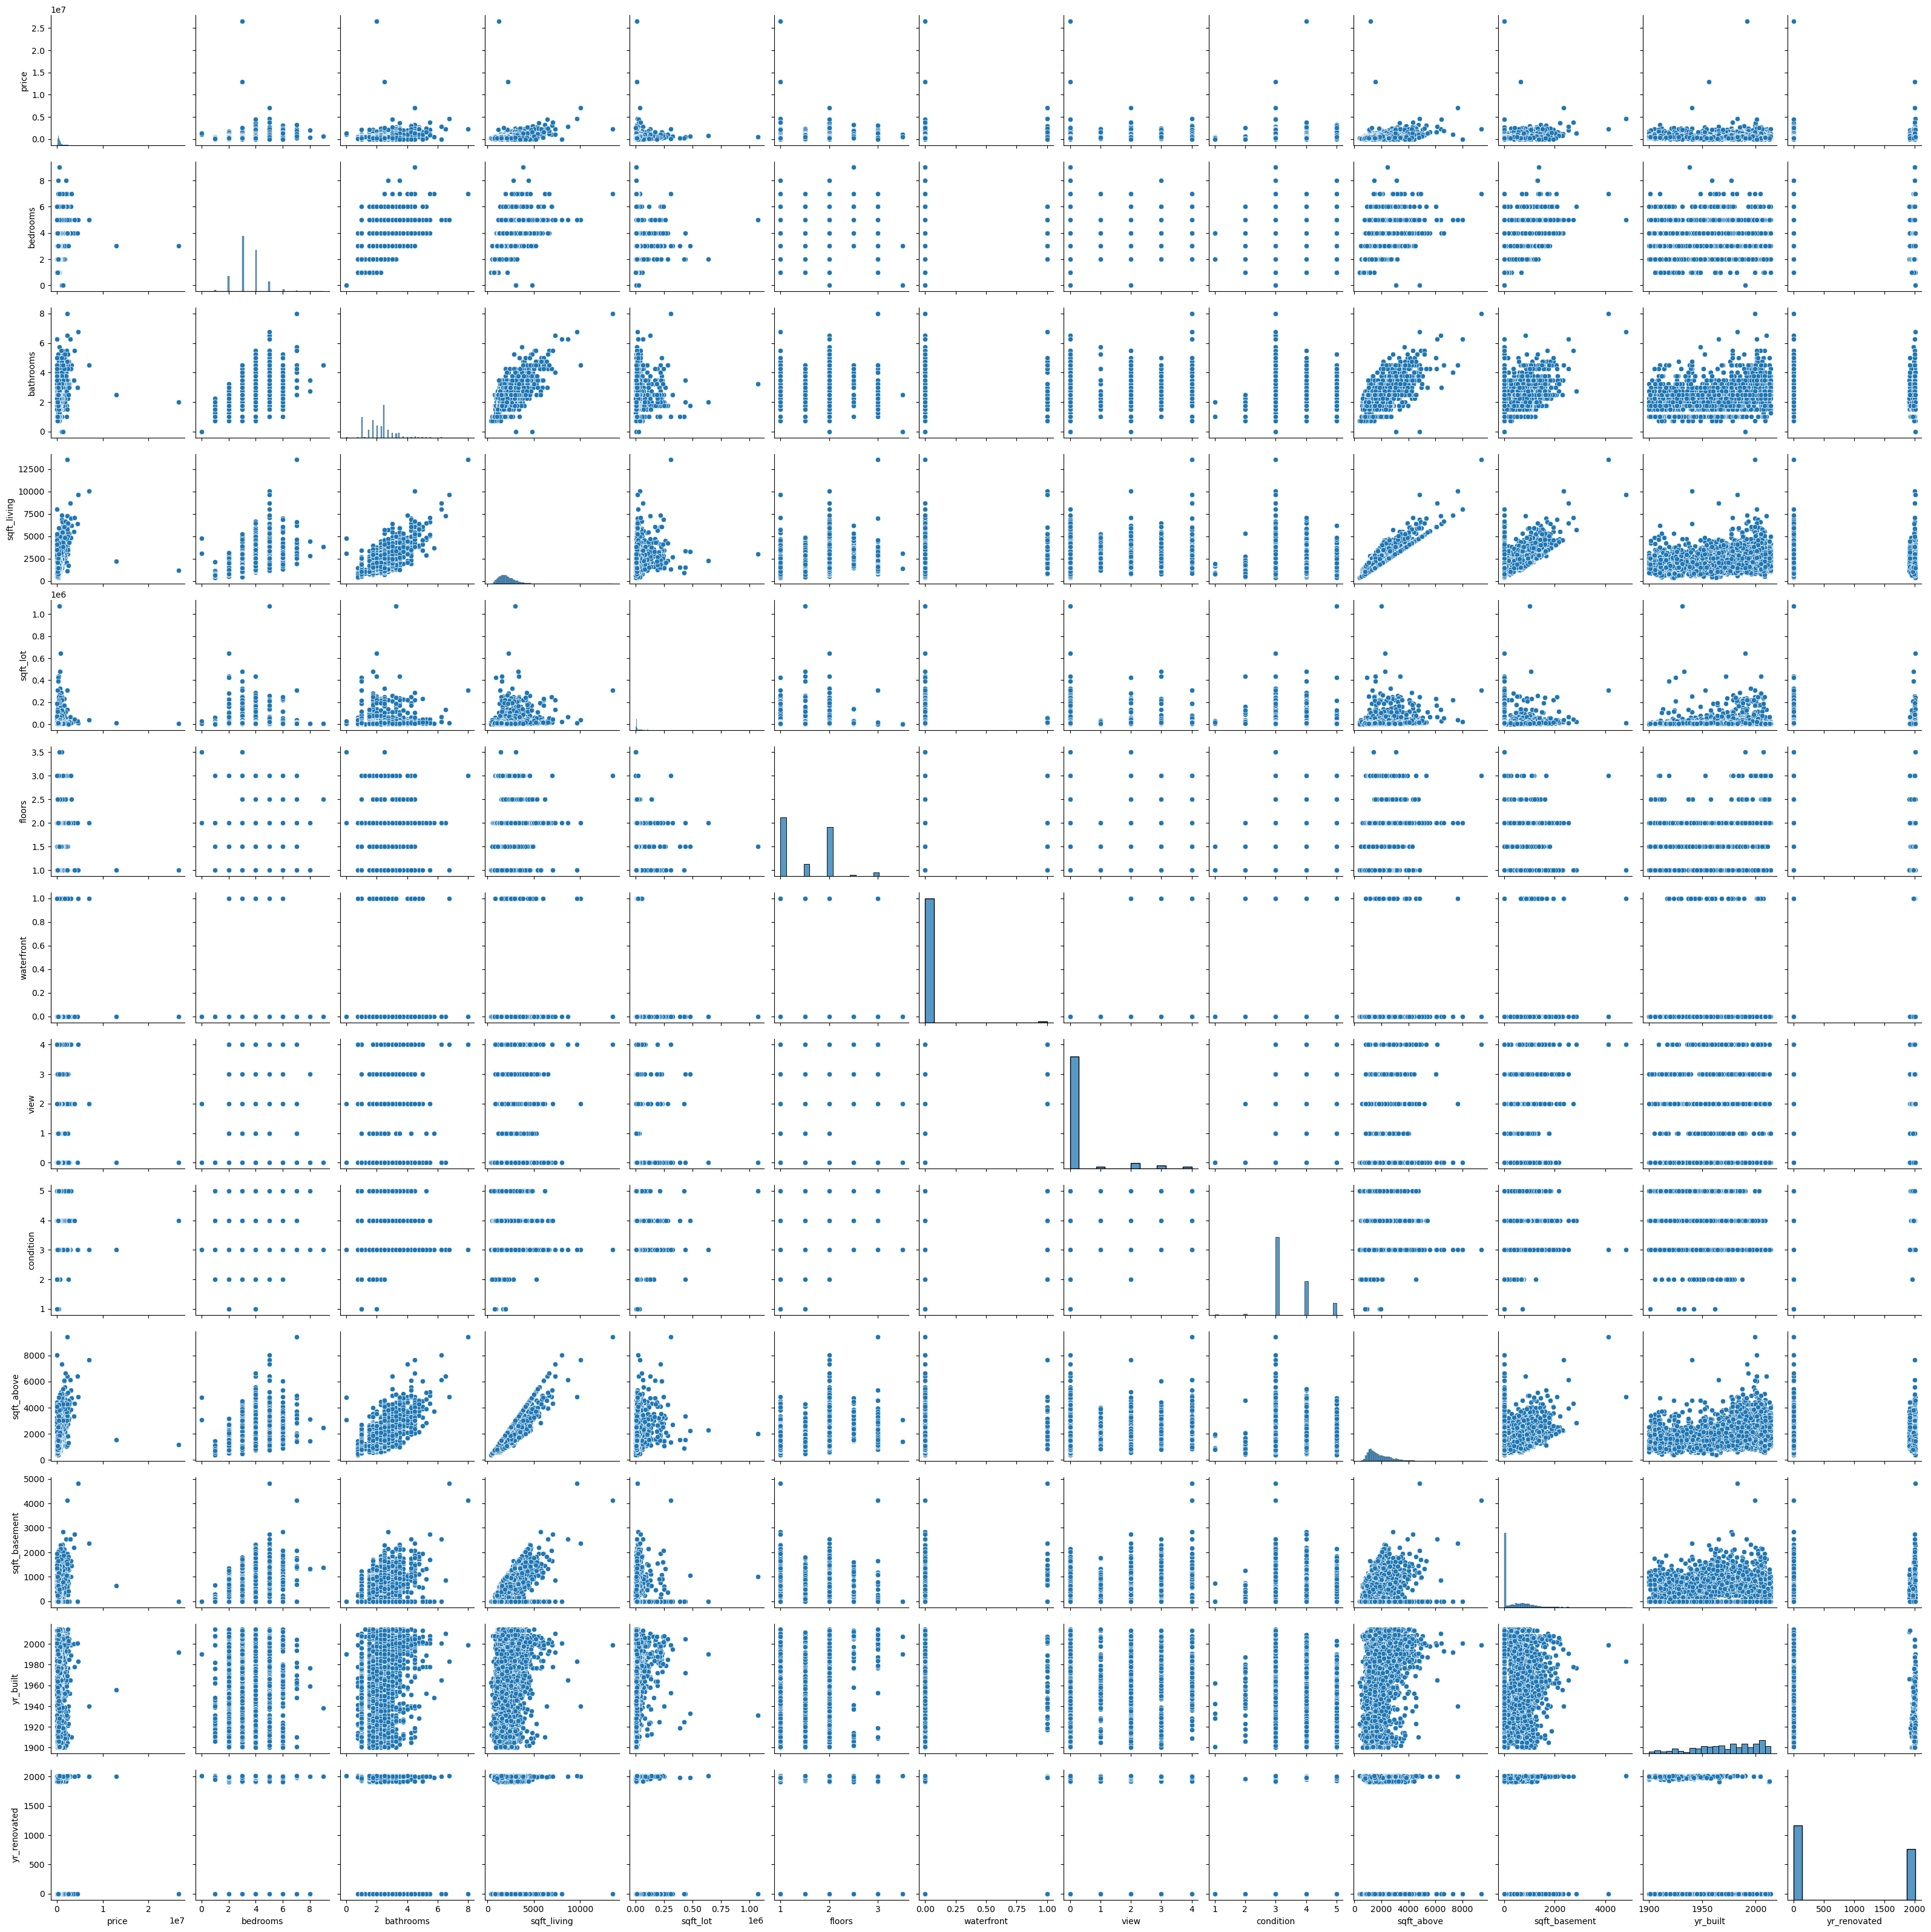

In [16]:
plt.figure(figsize=(25, 5))
sns.pairplot(df)
plt.show()

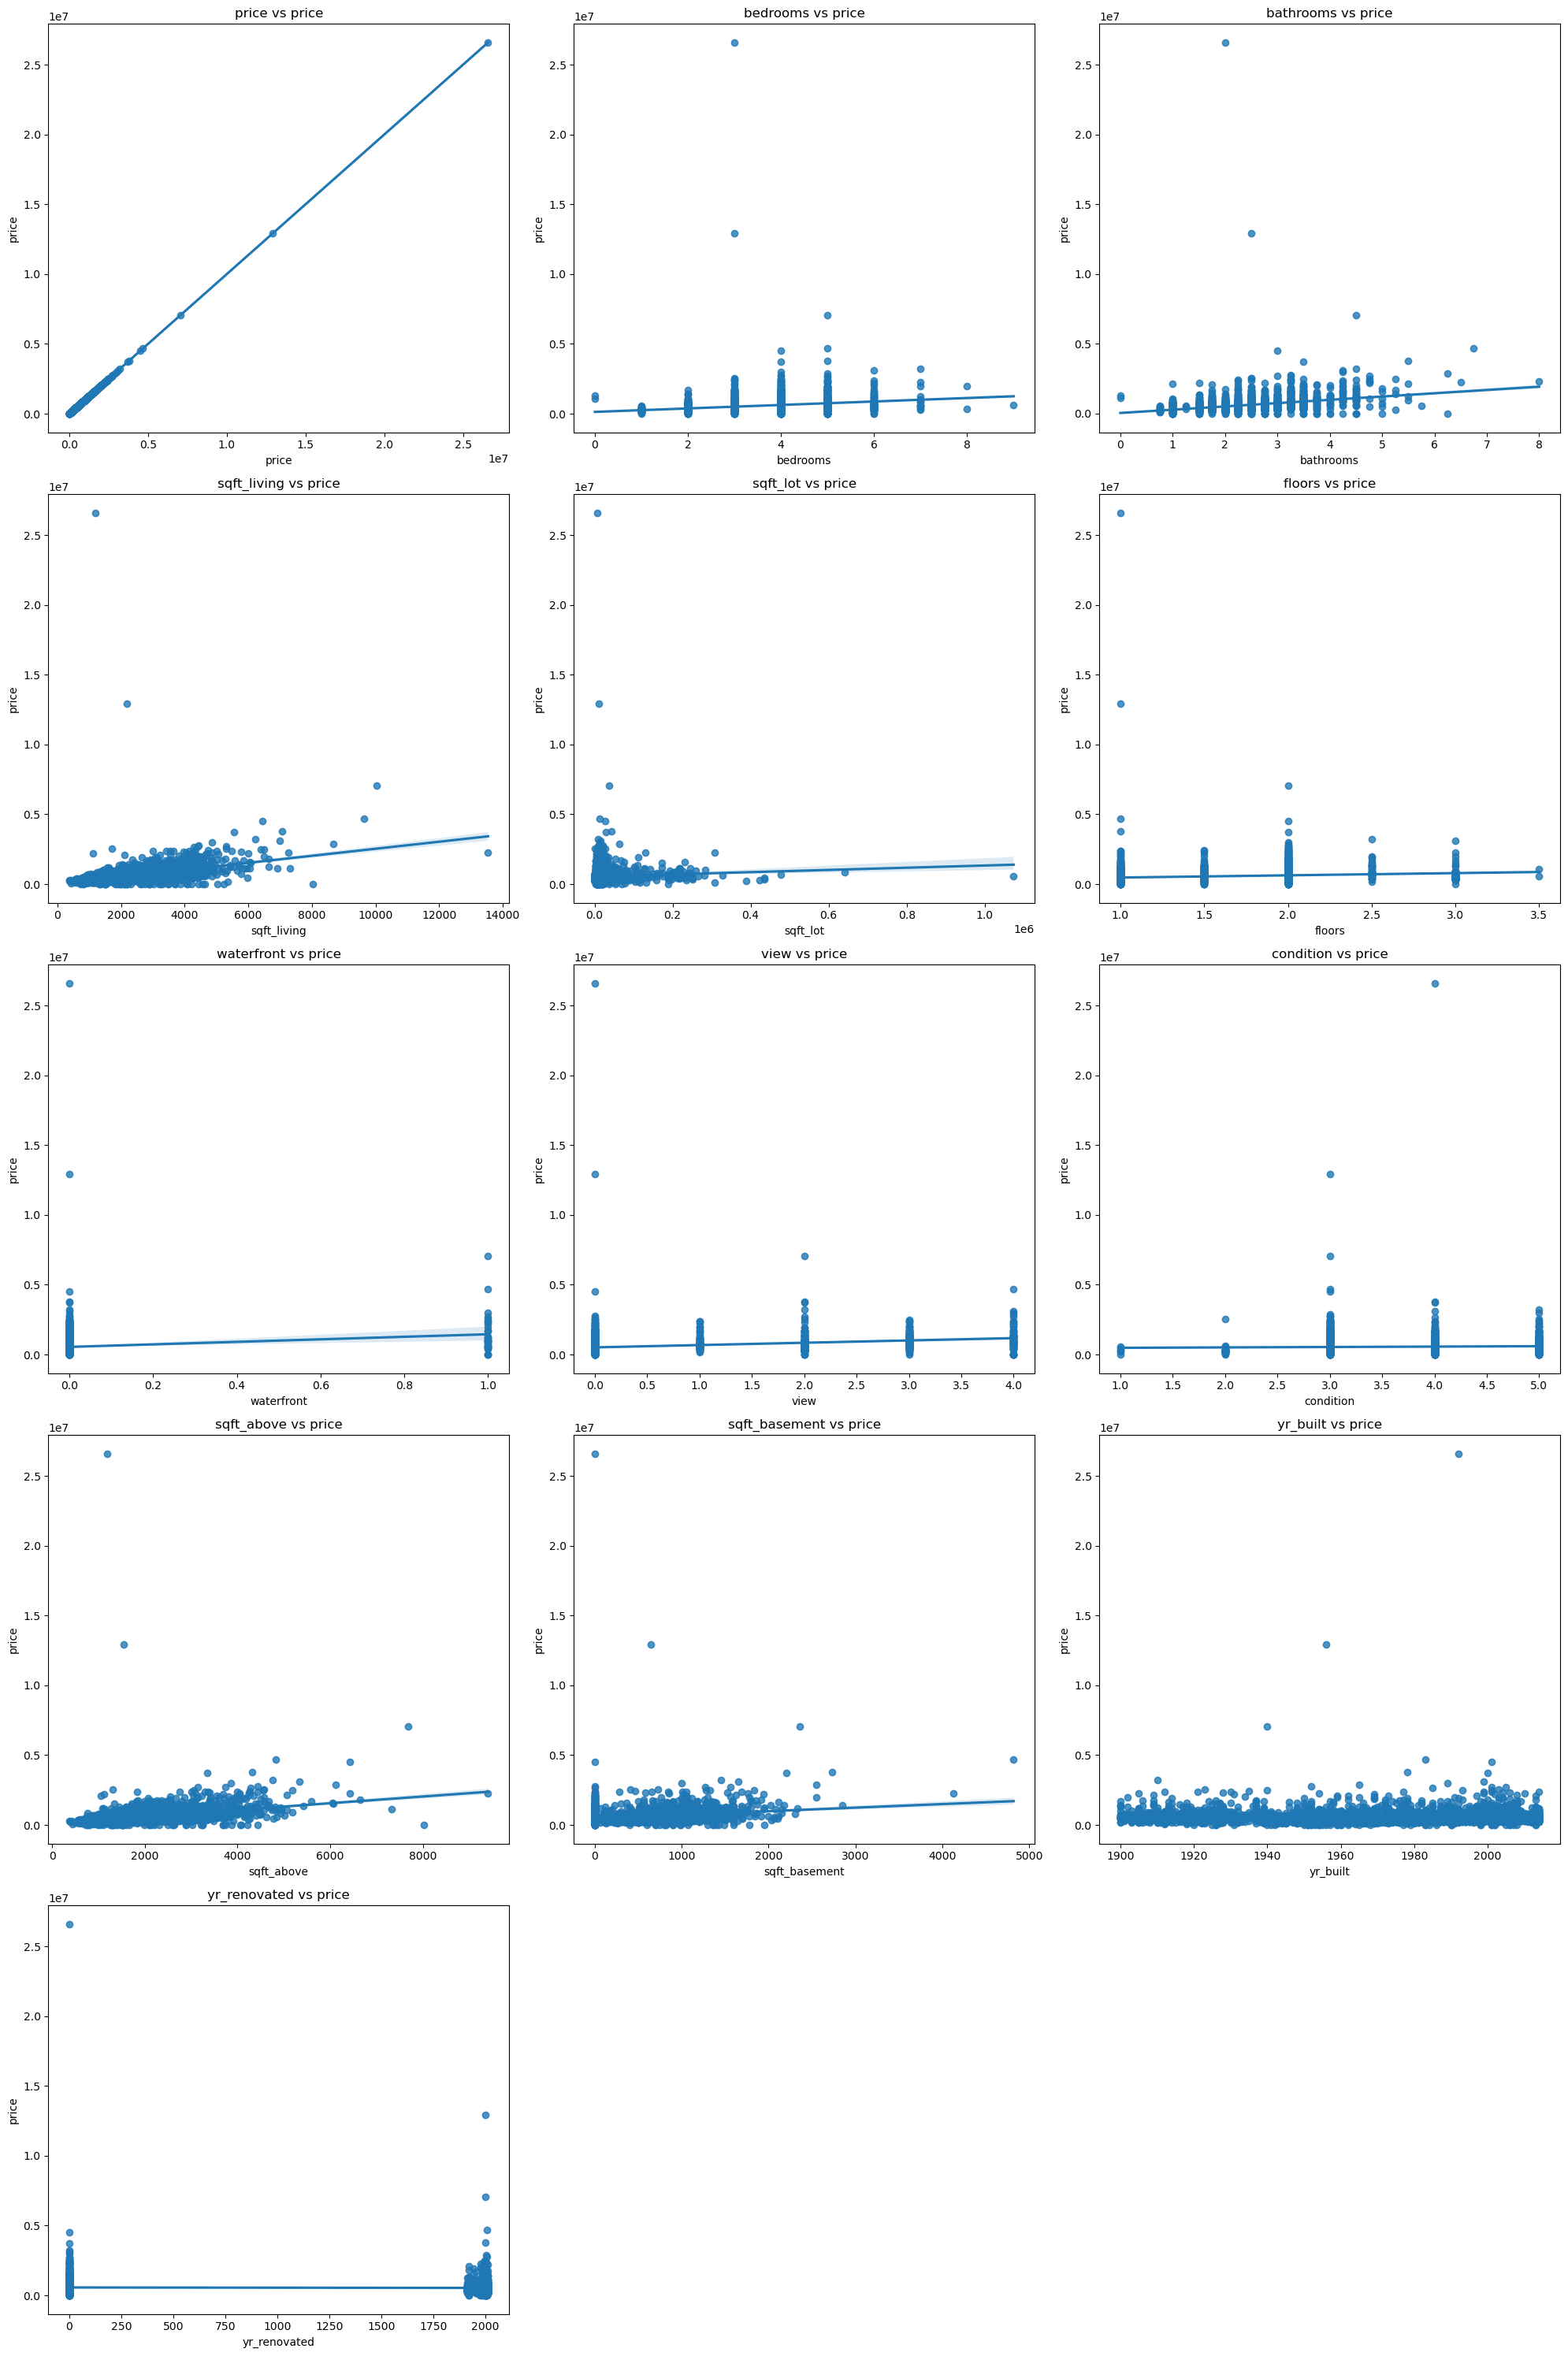

In [17]:
#chart 4 -  Regression plot for each feature against the target column
# Define the target column for regression analysis
target_column = "price"

# Calculate the number of numeric features to plot
n_plots = len(numeric_features)

# Set the number of columns for the plot grid
cols = 3 

# Calculate the number of rows needed for the grid (using ceiling division)
rows = -(-n_plots // cols) 

# Create a grid of subplots with specified rows and columns
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 30))

# Flatten the axes array to simplify indexing
axes = axes.flatten()
# Iterate over numeric features to create scatter plots with regression lines
for idx, column in enumerate(numeric_features):
    # Create a regression plot for each feature against the target column
    sns.regplot(data=df, x=column, y=target_column, ax=axes[idx])
    # Set the title for each subplot
    axes[idx].set_title(f'{column} vs {target_column}')

# Remove any unused subplots in the grid
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [18]:
df.city.value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [19]:
# Shows citiwies prices 
df.groupby("city")[["price"]].sum()

price
city                              
Algona                1,036,440.00
Auburn               52,683,917.93
Beaux Arts Village      745,000.00
Bellevue            242,293,669.62
Black Diamond         3,056,450.00
Bothell              15,887,582.50
Burien               25,822,096.39
Carnation            11,192,543.00
Clyde Hill           14,541,400.00
Covington            12,737,907.14
Des Moines           17,689,567.71
Duvall               16,967,753.33
Enumclaw              8,613,208.33
Fall City             7,619,500.00
Federal Way          42,903,380.19
Inglewood-Finn Hill     425,000.00
Issaquah            111,482,620.78
Kenmore              29,534,606.67
Kent                 81,306,102.26
Kirkland            121,846,131.69
Lake Forest Park     16,145,100.00
Maple Valley         32,301,591.53
Medina               22,512,150.00
Mercer Island        96,648,315.33
Milton                  570,000.00
Newcastle            21,979,541.00
Normandy Park         9,122,275.00
North Bend           19,978,285.33
Pacific               1,351,400.00
Preston               1,124,900.00
Ravensdale            3,598,500.00
Redmond             156,897,640.67
Renton              110,473,003.13
Sammamish           120,210,577.12
SeaTac                7,113,428.00
Seattle             912,084,336.04
Shoreline            51,708,260.78
Skykomish               699,000.00
Snoqualmie           38,077,676.00
Snoqualmie Pass         525,000.00
Tukwila               8,940,412.00
Vashon               13,704,150.00
Woodinville          70,099,977.50
Yarrow Point          4,779,350.00

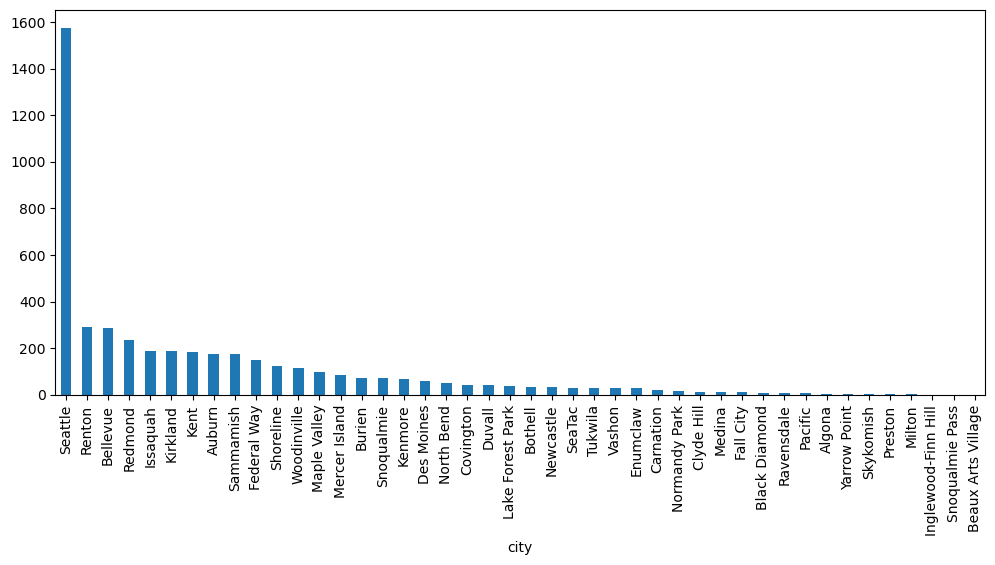

In [20]:
#chart 5 - shows highest price in city 
df.city.value_counts().plot(kind='bar', figsize=(12,5))
plt.show()

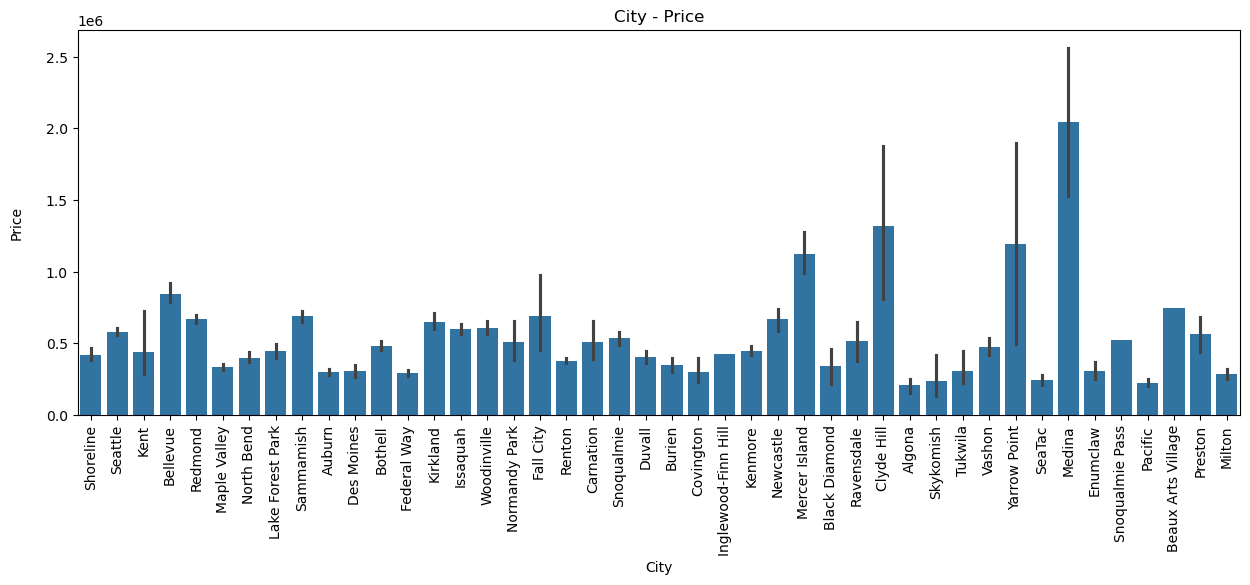

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x = df['city'], y = df.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

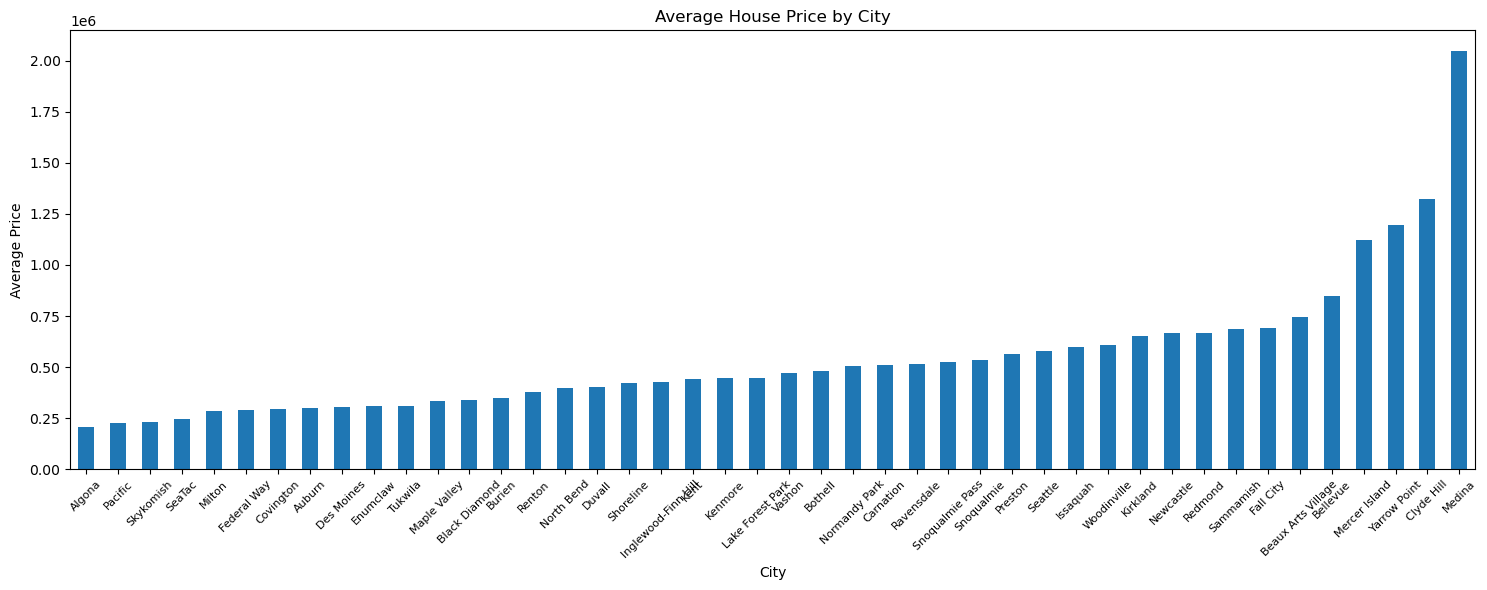

In [22]:
avg_price_by_city = df.groupby('city')['price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_city.plot(kind='bar')
plt.title('Average House Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()

plt.show()

In [23]:
df.street.value_counts()


street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [24]:
df.groupby("street")[["price"]].sum()


price
street                        
1 View Ln NE        309,620.00
10 W Etruria St     625,000.00
100 20th Ave E      600,000.00
100 24th Ave E      460,000.00
100 Mt Si Pl NW     575,000.00
...                        ...
Shangri-La Way NW   627,000.00
Sunrise Loop Trail  754,800.00
Tolt Pipeline Trail 435,000.00
Trossachs Blvd SE   735,000.00
Valley View Trail   693,000.00

[4525 rows x 1 columns]

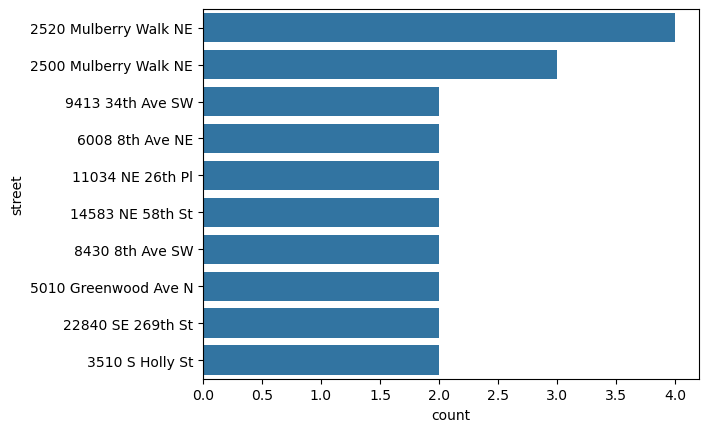

In [25]:
top_10_street = df['street'].value_counts().head(10)
sns.barplot(x = top_10_street, y=top_10_street.index)
plt.show()

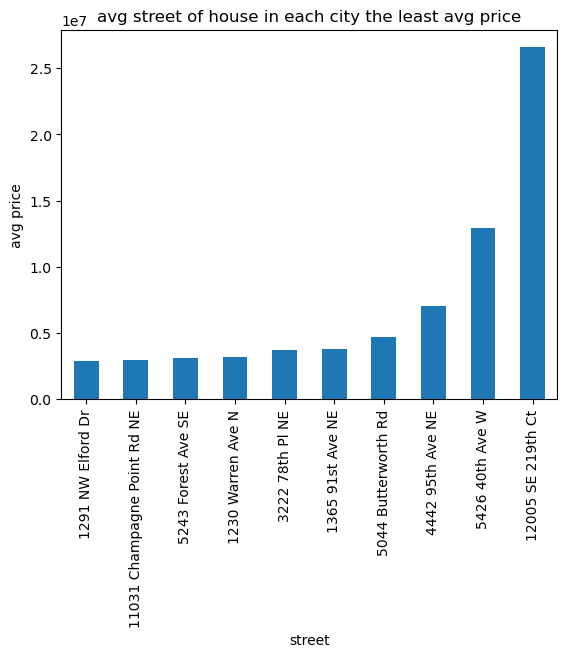

In [26]:
df.groupby('street')['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("street")
plt.ylabel("avg price")
plt.title("avg street of house in each city the least avg price");

plt.show()

In [27]:
df.statezip.value_counts()


statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [28]:
df.groupby("statezip")[["price"]].sum()


price
statezip              
WA 98001 17,268,231.71
WA 98002  8,047,703.00
WA 98003 14,372,430.00
WA 98004 97,465,845.20
WA 98005 22,584,596.33
...                ...
WA 98188  6,025,778.00
WA 98198 17,235,367.71
WA 98199 64,134,789.10
WA 98288    699,000.00
WA 98354    570,000.00

[77 rows x 1 columns]

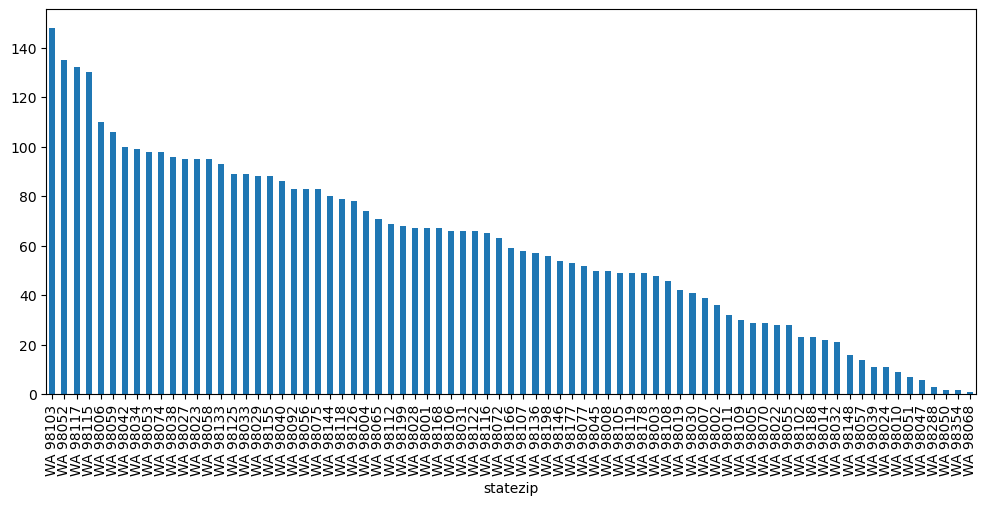

In [29]:
df.statezip.value_counts().plot(kind='bar', figsize=(12,5))
plt.show()

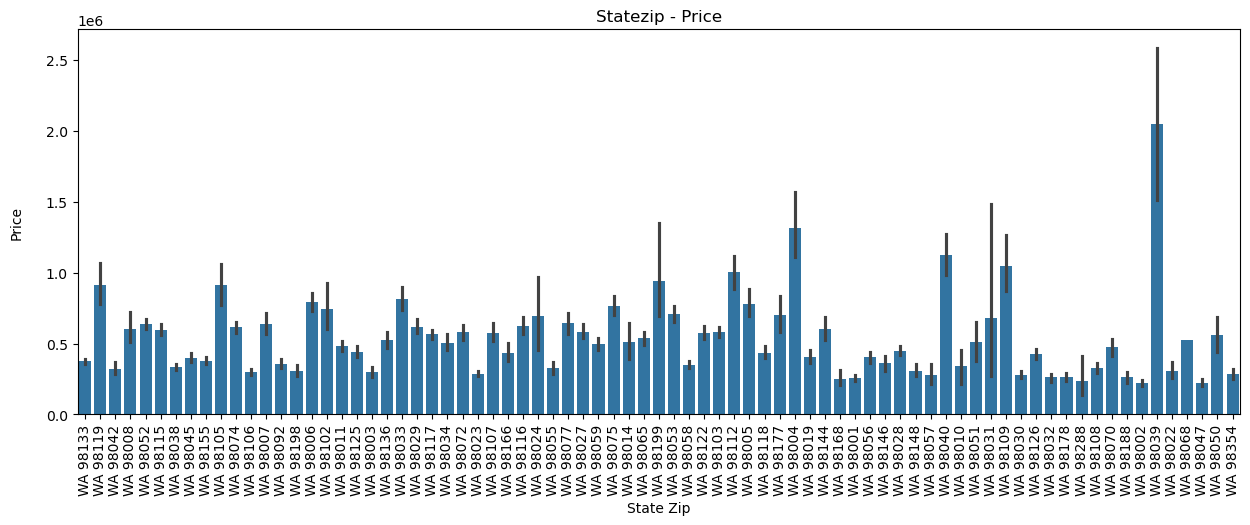

In [30]:
plt.figure(figsize=(15, 5))
sns.barplot(x = df['statezip'], y = df.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("State Zip")
plt.title("Statezip - Price")
plt.ylabel("Price\n")

plt.show()

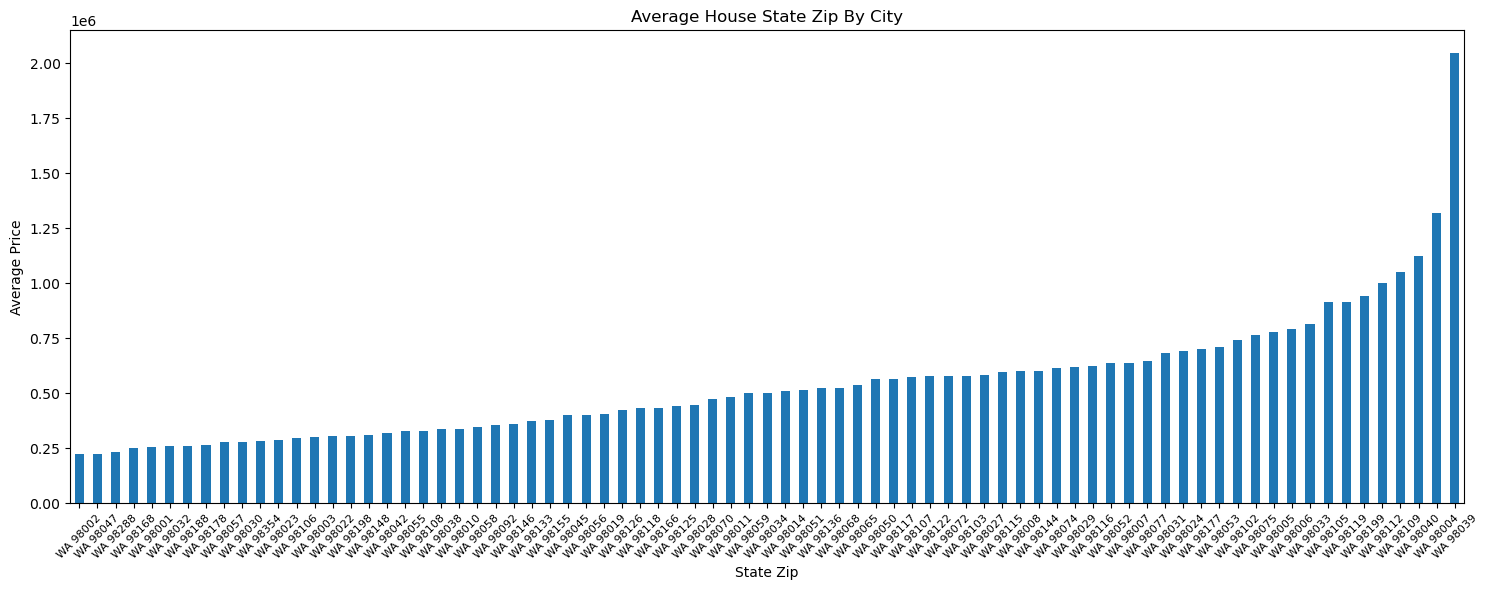

In [31]:
avg_price_by_city = df.groupby('statezip')['price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_city.plot(kind='bar')
plt.title('Average House State Zip By City')
plt.xlabel('State Zip')
plt.ylabel('Average Price')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

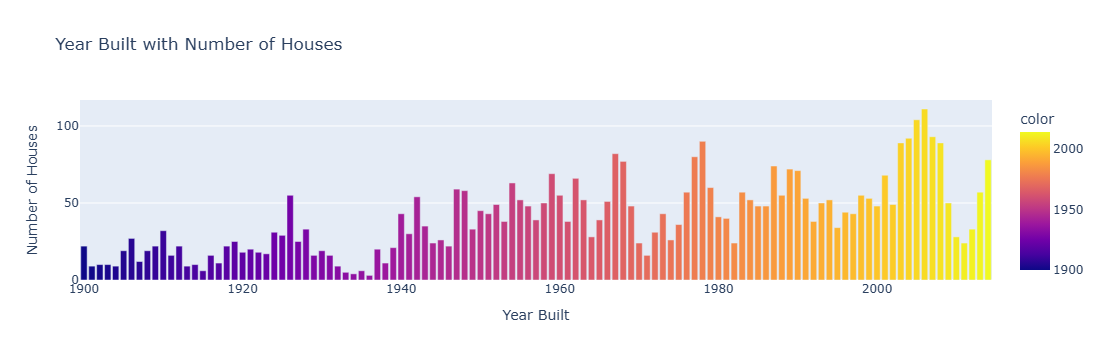

In [32]:
import plotly.express as px

px.bar(
    x=df.yr_built.value_counts().index,
    y=df.yr_built.value_counts().values,
    labels={"x": "Year Built", "y": "Number of Houses"},
    title="Year Built with Number of Houses",
    color=df.yr_built.value_counts().index,
)

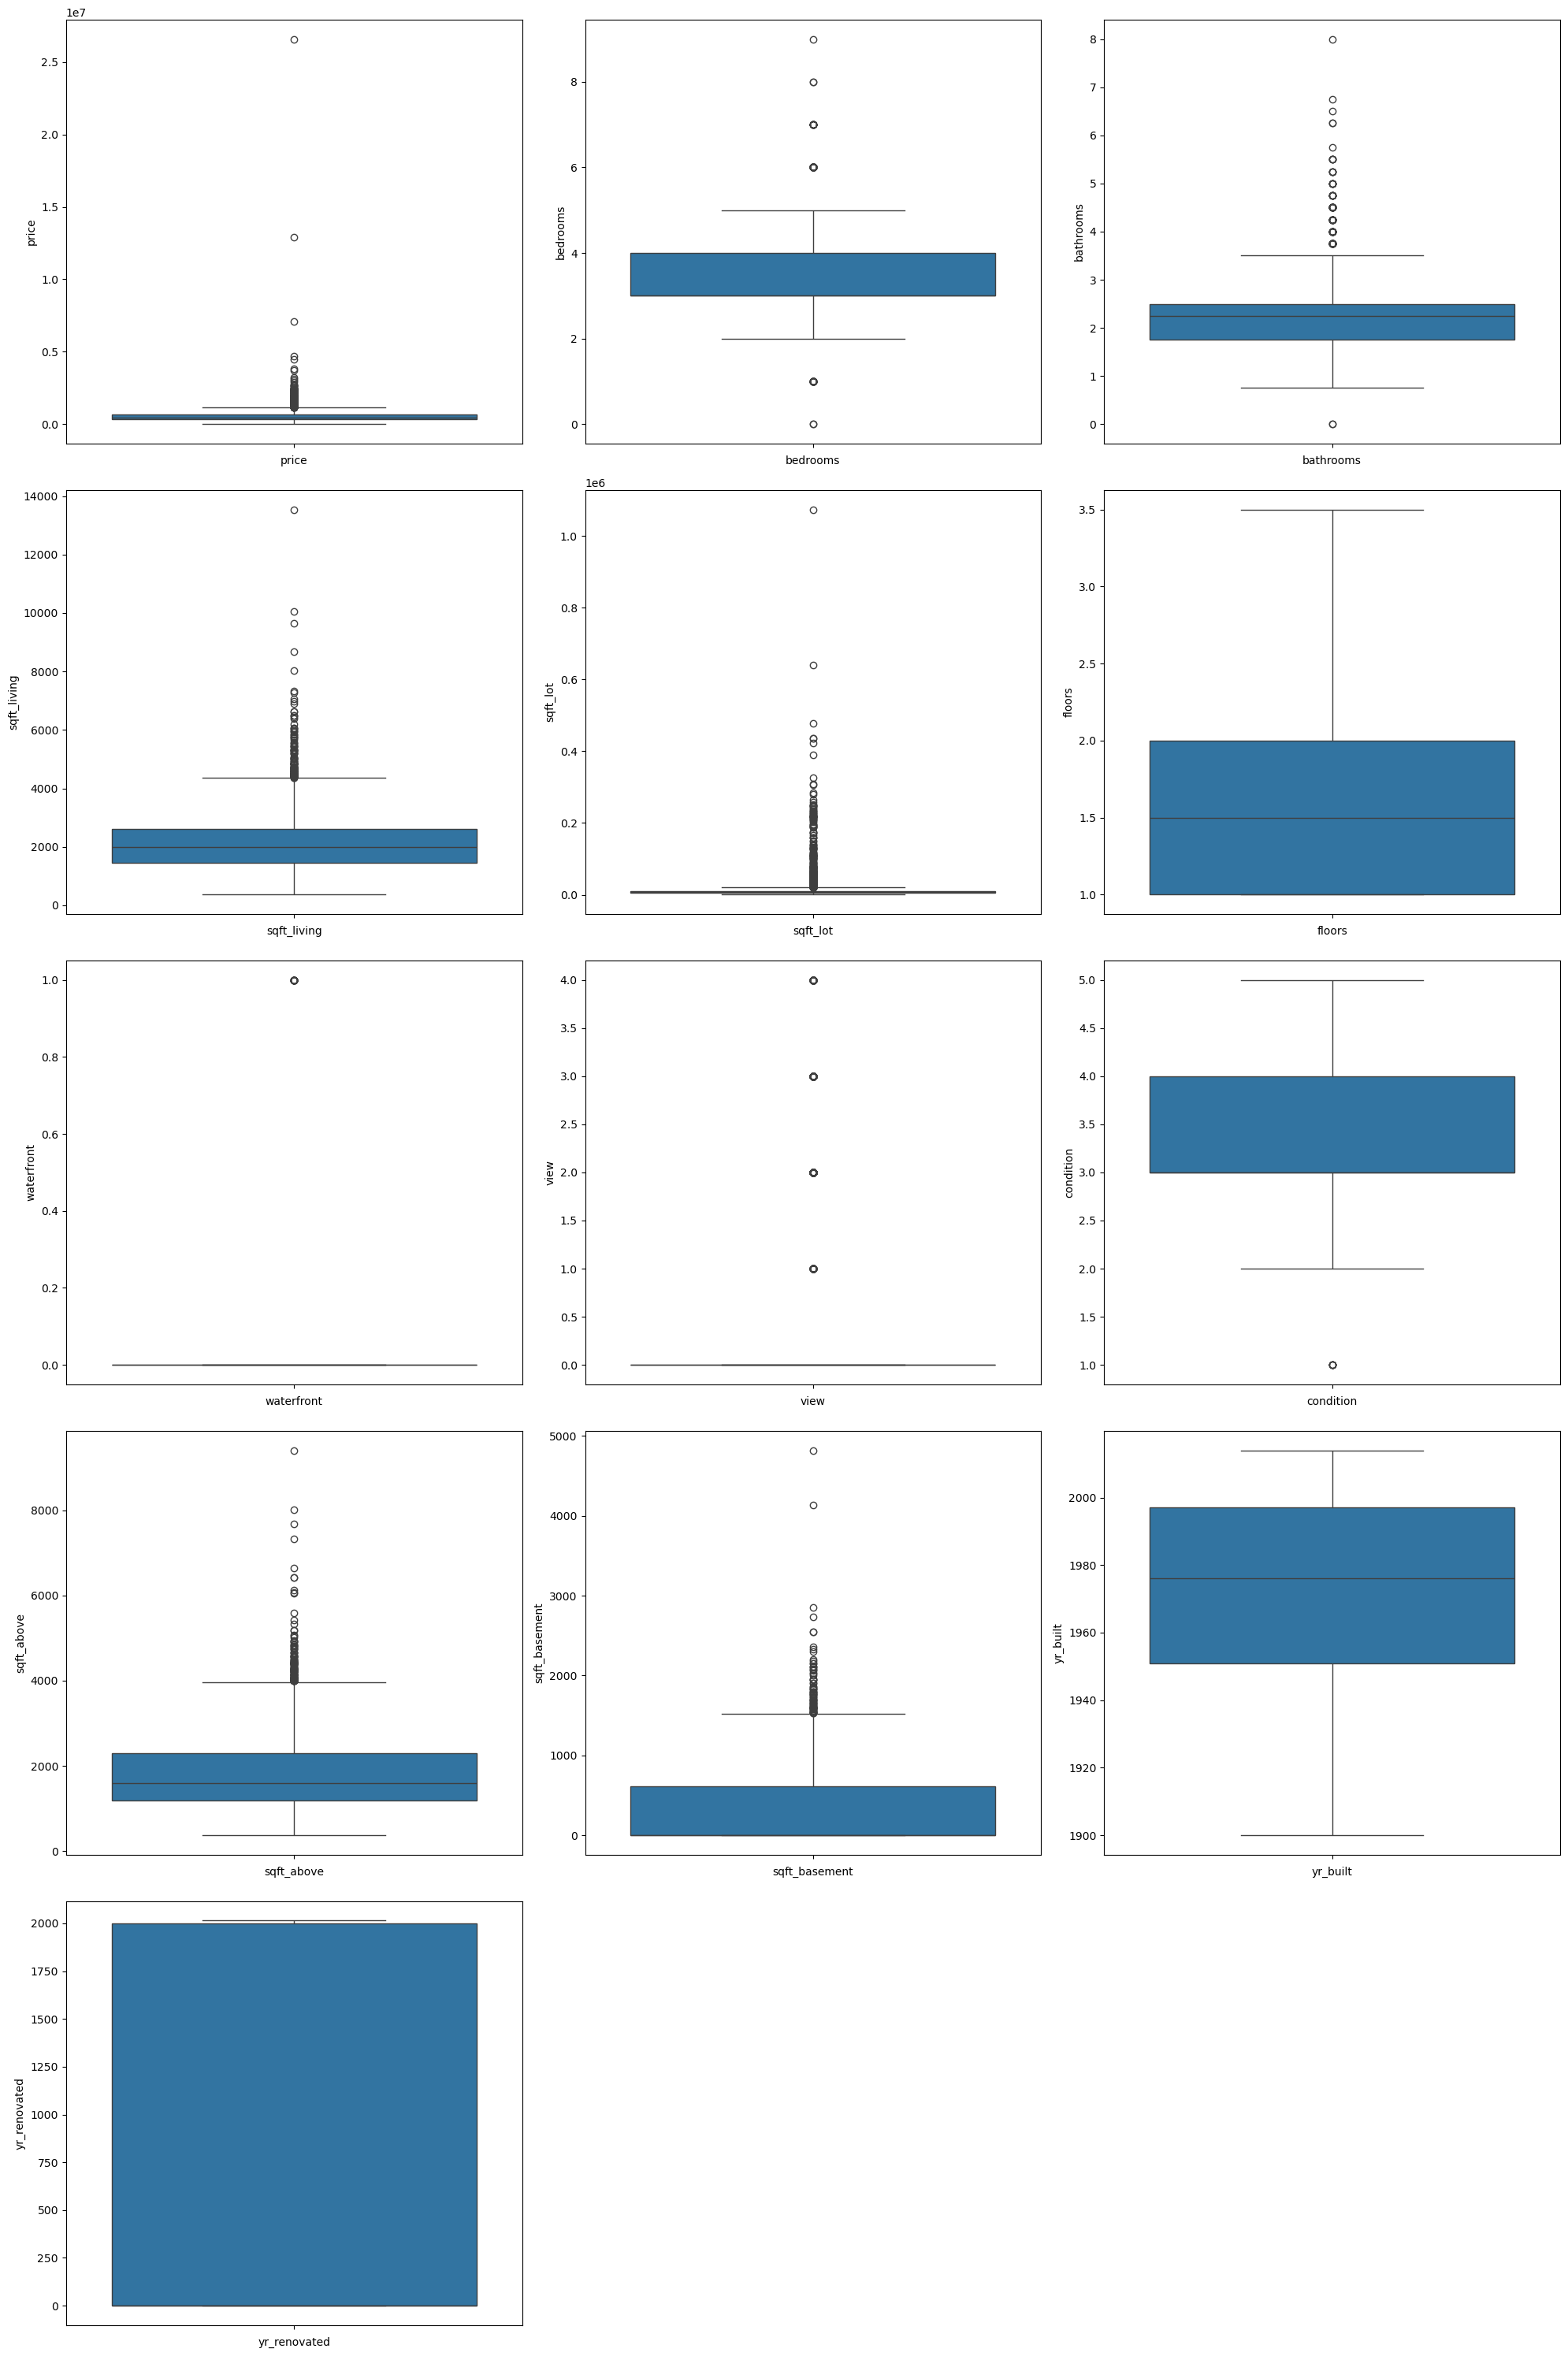

In [33]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
num_columns = len(numerical_data.columns)

cols = 3
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,30))

axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.show()

###  Cheacking Outliers

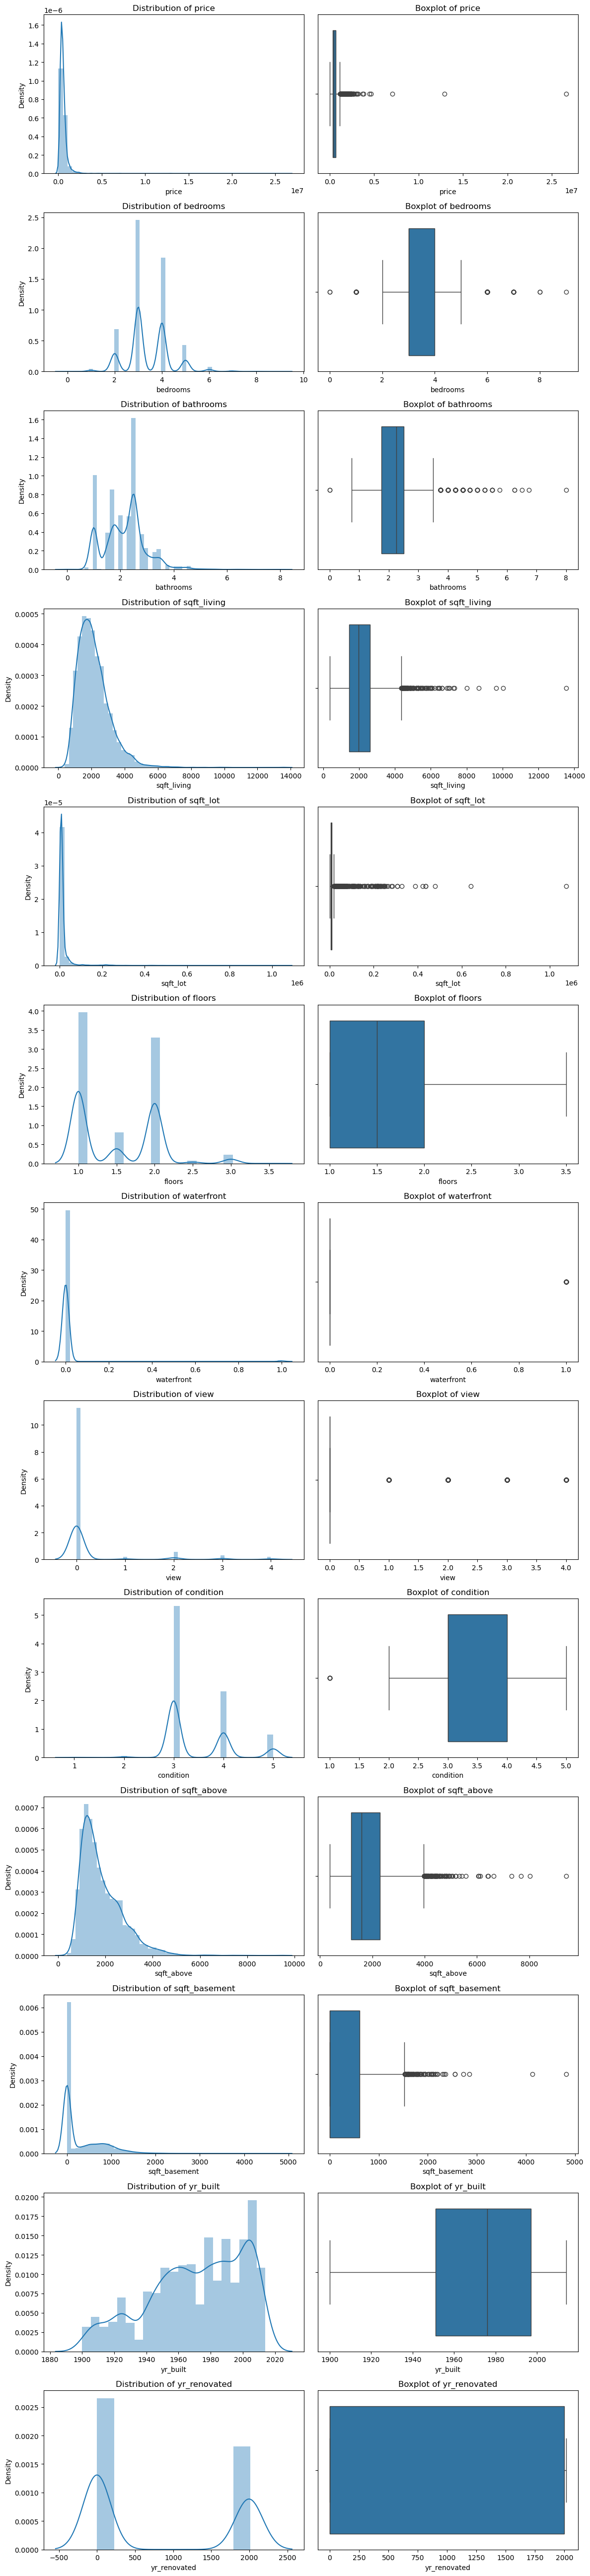

In [34]:
# Calculate rows needed based on the number of columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])
n_cols = len(numerical_data.columns)
n_rows = n_cols

# Adjust figsize dynamically
plt.figure(figsize=(12, 4 * n_rows))

# Loop through each column in the numerical data
for i, col in enumerate(numerical_data.columns):
    # Create a subplot for the distribution plot
    plt.subplot(n_rows, 2, 2 * i + 1)
    # sns.histplot(numerical_data[col], kde=True, bins=30)  # Updated to use sns.histplot
    sns.distplot(df[col], kde=True, hist=True)
    plt.title(f'Distribution of {col}')
     # Create a subplot for the boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [35]:
house_data2 = df.copy()
house_data2.head()

date        price  bedrooms  bathrooms  sqft_living  \
0  2014-05-02 00:00:00   313,000.00      3.00       1.50         1340   
1  2014-05-02 00:00:00 2,384,000.00      5.00       2.50         3650   
2  2014-05-02 00:00:00   342,000.00      3.00       2.00         1930   
3  2014-05-02 00:00:00   420,000.00      3.00       2.25         2000   
4  2014-05-02 00:00:00   550,000.00      4.00       2.50         1940   

   sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  \
0      7912    1.50           0     0          3        1340              0   
1      9050    2.00           0     4          5        3370            280   
2     11947    1.00           0     0          4        1930              0   
3      8030    1.00           0     0          4        1000           1000   
4     10500    1.00           0     0          4        1140            800   

   yr_built  yr_renovated                    street       city  statezip  \
0      1955          2005      18810 Densmore Ave N  Shoreline  WA 98133   
1      1921             0           709 W Blaine St    Seattle  WA 98119   
2      1966             0  26206-26214 143rd Ave SE       Kent  WA 98042   
3      1963             0           857 170th Pl NE   Bellevue  WA 98008   
4      1976          1992         9105 170th Ave NE    Redmond  WA 98052   

  country  
0     USA  
1     USA  
2     USA  
3     USA  
4     USA

In [36]:
def find_outliers_iqr_multiple_columns(df, columns):
    """
    Identify outliers in multiple specified columns of a data frame using the IQR method.
    """
    outliers_summary = {}
    
    for column in columns:
        # Calculate IQR for the column
        percentile25 = df[column].quantile(0.25)
        percentile75 = df[column].quantile(0.75)
        iqr = percentile75 - percentile25
        lower_limit = percentile25 - 1.5 * iqr
        upper_limit = percentile75 + 1.5 * iqr
        
        # Find lower and upper outliers
        lower_outliers = df[df[column] < lower_limit]
        upper_outliers = df[df[column] > upper_limit]
         # Store results in a dictionary
        outliers_summary[column] = {
            'lower_outliers_count': len(lower_outliers),
            'upper_outliers_count': len(upper_outliers),
            'lower_limit': lower_limit,
            'upper_limit': upper_limit
        }
    
    return outliers_summary

# Example Usage
# columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement']
columns = house_data2.select_dtypes(include=['float64', 'int64'])
outliers_summary = find_outliers_iqr_multiple_columns(house_data2, columns)

# Print Results
for column, summary in outliers_summary.items():
    print(f"\nColumn: {column}")
    print(f"Lower Outliers Count: {summary['lower_outliers_count']}")
    print(f"Upper Outliers Count: {summary['upper_outliers_count']}")
    print(f"Lower Limit: {summary['lower_limit']}")
    print(f"Upper Limit: {summary['upper_limit']}")


Column: price
Lower Outliers Count: 0
Upper Outliers Count: 240
Lower Limit: -175256.25
Upper Limit: 1153093.75

Column: bedrooms
Lower Outliers Count: 40
Upper Outliers Count: 78
Lower Limit: 1.5
Upper Limit: 5.5

Column: bathrooms
Lower Outliers Count: 2
Upper Outliers Count: 139
Lower Limit: 0.625
Upper Limit: 3.625

Column: sqft_living
Lower Outliers Count: 0
Upper Outliers Count: 129
Lower Limit: -280.0
Upper Limit: 4360.0

Column: sqft_lot
Lower Outliers Count: 0
Upper Outliers Count: 541
Lower Limit: -4000.0
Upper Limit: 20002.0

Column: floors
Lower Outliers Count: 0
Upper Outliers Count: 0
Lower Limit: -0.5
Upper Limit: 3.5

Column: waterfront
Lower Outliers Count: 0
Upper Outliers Count: 33
Lower Limit: 0.0
Upper Limit: 0.0

Column: view
Lower Outliers Count: 0
Upper Outliers Count: 460
Lower Limit: 0.0
Upper Limit: 0.0

Column: condition
Lower Outliers Count: 6
Upper Outliers Count: 0
Lower Limit: 1.5
Upper Limit: 5.5

Column: sqft_above
Lower Outliers Count: 0
Upper Outlie

In [37]:
def cap_outliers(series, lower_limit, upper_limit):
    """
    Caps the outliers in a pandas Series to the specified limits.
    """
    return np.where(
        series > upper_limit,
        upper_limit,
        np.where(
            series < lower_limit,
            lower_limit,
            series
        )
    )

# Example Usage
# columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement']
columns = house_data2.select_dtypes(include=['float64', 'int64'])
outliers_summary = find_outliers_iqr_multiple_columns(house_data2, columns)

# Cap outliers for each column
for column in columns:
    lower_limit = outliers_summary[column]['lower_limit']
    upper_limit = outliers_summary[column]['upper_limit']
    house_data2[column] = cap_outliers(house_data2[column], lower_limit, upper_limit)

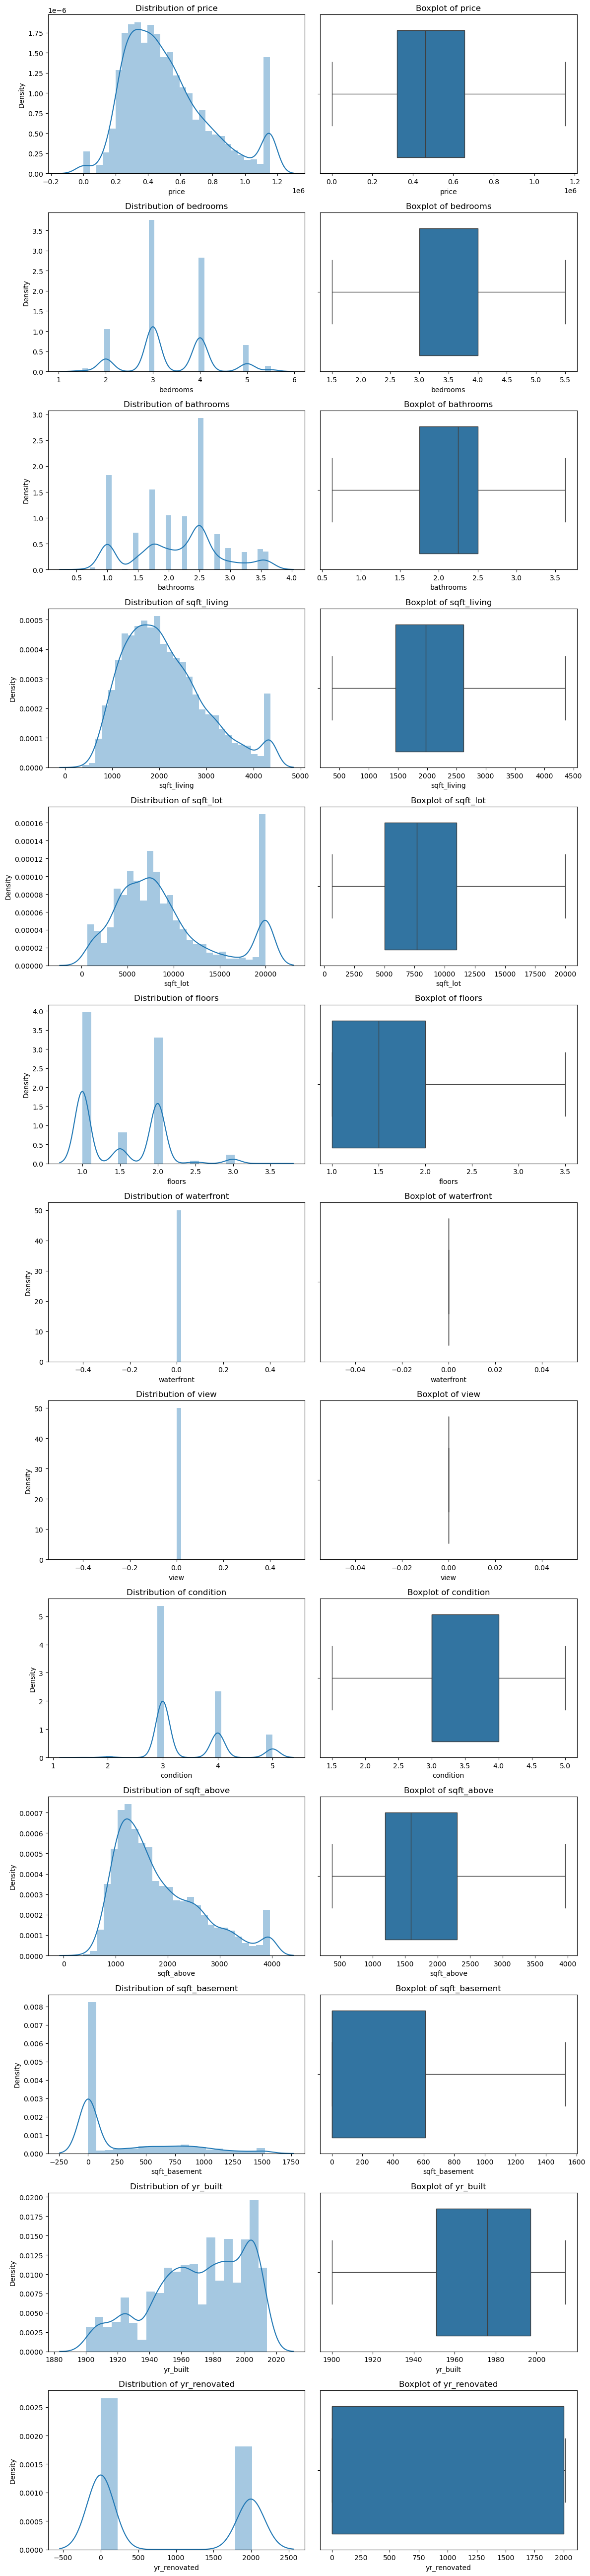

In [38]:
# Calculate rows needed based on the number of columns
numerical_data = house_data2.select_dtypes(include=['float64', 'int64'])
n_cols = len(numerical_data.columns)
n_rows = n_cols

# Adjust figsize dynamically
plt.figure(figsize=(12, 4 * n_rows))

# Loop through each column in the numerical data
for i, col in enumerate(numerical_data.columns):
    # Create a subplot for the distribution plot
    plt.subplot(n_rows, 2, 2 * i + 1)
    # sns.histplot(numerical_data[col], kde=True, bins=30)
    sns.distplot(house_data2[col], kde=True, hist=True)
    plt.title(f'Distribution of {col}')

    # Create a subplot for the boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

In [39]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [40]:
house_data2.head()


date        price  bedrooms  bathrooms  sqft_living  \
0  2014-05-02 00:00:00   313,000.00      3.00       1.50     1,340.00   
1  2014-05-02 00:00:00 1,153,093.75      5.00       2.50     3,650.00   
2  2014-05-02 00:00:00   342,000.00      3.00       2.00     1,930.00   
3  2014-05-02 00:00:00   420,000.00      3.00       2.25     2,000.00   
4  2014-05-02 00:00:00   550,000.00      4.00       2.50     1,940.00   

   sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  \
0  7,912.00    1.50        0.00  0.00       3.00    1,340.00           0.00   
1  9,050.00    2.00        0.00  0.00       5.00    3,370.00         280.00   
2 11,947.00    1.00        0.00  0.00       4.00    1,930.00           0.00   
3  8,030.00    1.00        0.00  0.00       4.00    1,000.00       1,000.00   
4 10,500.00    1.00        0.00  0.00       4.00    1,140.00         800.00   

   yr_built  yr_renovated                    street       city  statezip  \
0  1,955.00      2,005.00      18810 Densmore Ave N  Shoreline  WA 98133   
1  1,921.00          0.00           709 W Blaine St    Seattle  WA 98119   
2  1,966.00          0.00  26206-26214 143rd Ave SE       Kent  WA 98042   
3  1,963.00          0.00           857 170th Pl NE   Bellevue  WA 98008   
4  1,976.00      1,992.00         9105 170th Ave NE    Redmond  WA 98052   

  country  
0     USA  
1     USA  
2     USA  
3     USA  
4     USA

In [41]:
house_data2.shape


(4600, 18)

In [42]:
X = house_data2.drop(columns=['price'],axis=1)

In [43]:
X.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-05-02 00:00:00      3.00       1.50     1,340.00  7,912.00    1.50   
1  2014-05-02 00:00:00      5.00       2.50     3,650.00  9,050.00    2.00   
2  2014-05-02 00:00:00      3.00       2.00     1,930.00 11,947.00    1.00   
3  2014-05-02 00:00:00      3.00       2.25     2,000.00  8,030.00    1.00   
4  2014-05-02 00:00:00      4.00       2.50     1,940.00 10,500.00    1.00   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0        0.00  0.00       3.00    1,340.00           0.00  1,955.00   
1        0.00  0.00       5.00    3,370.00         280.00  1,921.00   
2        0.00  0.00       4.00    1,930.00           0.00  1,966.00   
3        0.00  0.00       4.00    1,000.00       1,000.00  1,963.00   
4        0.00  0.00       4.00    1,140.00         800.00  1,976.00   

   yr_renovated                    street       city  statezip country  
0      2,005.00      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1          0.00           709 W Blaine St    Seattle  WA 98119     USA  
2          0.00  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3          0.00           857 170th Pl NE   Bellevue  WA 98008     USA  
4      1,992.00         9105 170th Ave NE    Redmond  WA 98052     USA

In [44]:
y = house_data2['price']


In [45]:
y


0        313,000.00
1      1,153,093.75
2        342,000.00
3        420,000.00
4        550,000.00
           ...     
4595     308,166.67
4596     534,333.33
4597     416,904.17
4598     203,400.00
4599     220,600.00
Name: price, Length: 4600, dtype: float64

In [46]:
# Create Column Transformer with 3 types of transformers

# num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         # ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [47]:
X = preprocessor.fit_transform(X)


In [48]:
X.shape


(4600, 4717)

### Data Splitting

In [49]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3680, 4717), (920, 4717))

In [50]:
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

def evaluate_model(true, predicted, n, p):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    adj_r2 = adjusted_r2(r2_square, n, p)
    return mae, rmse, r2_square, adj_r2

## ***6. ML Model Implementation***

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(solver='lsqr'),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list = []
r2_list = []
adj_r2_list = []

# Get the number of features (p) and samples (n)
n_train, p = X_train.shape
n_test = X_test.shape[0]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset

    model_train_mae, model_train_rmse, model_train_r2, model_train_adj_r2 = evaluate_model(y_train, y_train_pred, n_train, p)
    
    model_test_mae, model_test_rmse, model_test_r2, model_test_adj_r2 = evaluate_model(y_test, y_test_pred, n_test, p)
print(list(models.keys())[i])
model_list.append(list(models.keys())[i])
    
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print("- Adjusted R2 Score: {:.4f}".format(model_train_adj_r2))

print('----------------------------------')
    
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
print("- Adjusted R2 Score: {:.4f}".format(model_test_adj_r2))
r2_list.append(model_test_r2)
adj_r2_list.append(model_test_adj_r2)
print('='*35)
print('\n')

AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 249139.7909
- Mean Absolute Error: 204523.1368
- R2 Score: 0.0894
- Adjusted R2 Score: 4.2273
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 250584.9776
- Mean Absolute Error: 203979.1892
- R2 Score: 0.0911
- Adjusted R2 Score: 1.2199




In [52]:
pd.DataFrame(list(zip(model_list, r2_list, adj_r2_list)), columns=['Model Name', 'R2_Score', 'Adjusted_R2_Score']).sort_values(by=["R2_Score","Adjusted_R2_Score"],ascending=False)

Model Name  R2_Score  Adjusted_R2_Score
0  AdaBoost Regressor      0.09               1.22

In [53]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 21.76


#### Explain the ML Model used and it's performance using scatter plot.

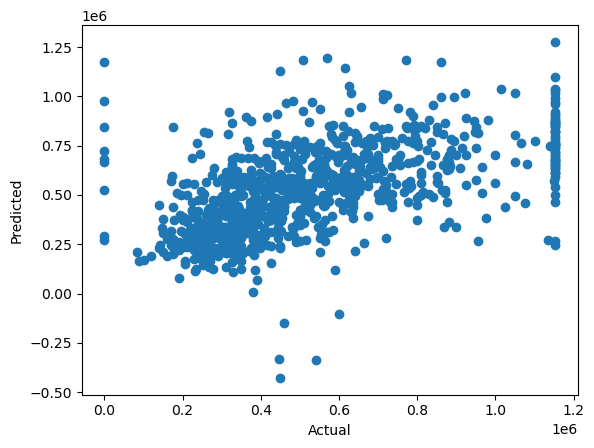

In [54]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

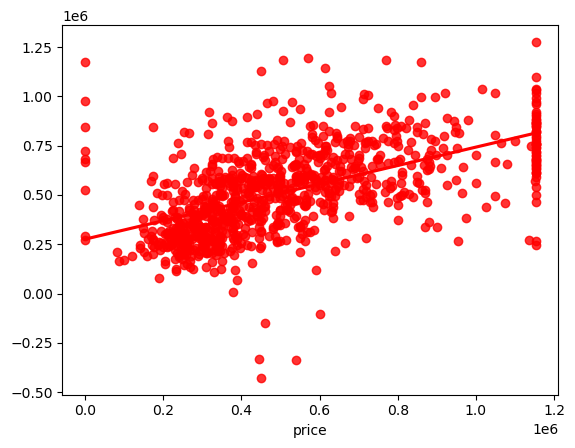

In [55]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Difference
3683    544,000.00       473,705.41   70,294.59
4411          0.00       271,657.01 -271,657.01
2584  1,153,093.75       870,546.86  282,546.89
69      365,000.00       407,513.53  -42,513.53
1844    275,000.00       359,369.66  -84,369.66
...            ...              ...         ...
1612    750,000.00       943,183.77 -193,183.77
1068    230,000.00       386,956.48 -156,956.48
4350  1,153,093.75       267,384.06  885,709.69
3027    687,000.00       755,006.82  -68,006.82
3455    289,659.00       348,021.38  -58,362.38

[920 rows x 3 columns]

# **Conclusion**

The project successfully demonstrates how machine learning can be applied to real estate price prediction. Through data preprocessing, exploratory analysis, and feature engineering, a predictive model was developed using regression techniques. The model’s performance was evaluated using error metrics, providing insights into its accuracy and reliability.

#### **Future improvements could include:**

  -  Using additional real estate market data for better predictions.
  -  Implementing advanced algorithms like ensemble methods.
  -  Incorporating external economic factors such as interest rates and inflation.

This project highlights the importance of data-driven decision-making in real estate and the potential of machine learning to improve price estimation accuracy.